# importing the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

# Loading the dataset

In [157]:
# Load the dataset
data = pd.read_csv('kidney_disease.csv').drop('id', axis=1)
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# Pre-processing the data

In [158]:
# Convert categorical variables to numerical
le = preprocessing.LabelEncoder()
categorical_cols = ["rbc","pc","pcc","ba","pcv","wc","rc","htn","dm","cad","appet","pe","ane","classification"]
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    print(le.classes_)

['abnormal' 'normal' nan]
['abnormal' 'normal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['\t43' '\t?' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25'
 '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39'
 '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53'
 '54' '9' nan]
['\t6200' '\t8400' '\t?' '10200' '10300' '10400' '10500' '10700' '10800'
 '10900' '11000' '11200' '11300' '11400' '11500' '11800' '11900' '12000'
 '12100' '12200' '12300' '12400' '12500' '12700' '12800' '13200' '13600'
 '14600' '14900' '15200' '15700' '16300' '16700' '18900' '19100' '21600'
 '2200' '2600' '26400' '3800' '4100' '4200' '4300' '4500' '4700' '4900'
 '5000' '5100' '5200' '5300' '5400' '5500' '5600' '5700' '5800' '5900'
 '6000' '6200' '6300' '6400' '6500' '6600' '6700' '6800' '6900' '7000'
 '7100' '7200' '7300' '7400' '7500' '7700' '7800' '7900' '8000' '8100'
 '8200' '8300' '8400' '8500' '8600' '8800' '9000' '9100' '9200' '9300'
 '9400' '95

In [159]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int32
wc                  int32
rc                  int32
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object

In [160]:
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,32,72,31,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,...,26,56,46,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,46,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,18,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,25,0,3,1,0,0,0,0


In [161]:
# filling null values
for col in data.columns:
    data[col].fillna(data[col].median(),inplace=True)
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,32,72,31,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,121.0,...,26,56,46,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,46,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,18,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,25,0,3,1,0,0,0,0


In [162]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,1.262500,0.972500,0.125000,0.075000,145.062500,...,29.852500,64.43000,32.45500,0.377500,3.310000,1.090000,0.210000,0.195000,0.15500,0.755000
std,16.982996,13.489785,0.005434,1.31313,1.040038,0.655491,0.593823,0.360138,0.299331,75.260774,...,10.529145,28.14962,12.60099,0.495588,0.591417,0.319618,0.413918,0.402965,0.36921,0.968152
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,22.000000,49.00000,24.00000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,30.000000,71.00000,33.00000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,2.000000,1.000000,0.000000,0.000000,150.000000,...,39.250000,92.00000,46.00000,1.000000,4.000000,1.000000,0.000000,0.000000,0.00000,2.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,2.000000,2.000000,2.000000,2.000000,490.000000,...,44.000000,92.00000,46.00000,2.000000,5.000000,3.000000,2.000000,2.000000,2.00000,2.000000


In [163]:
# checking whether are any null values
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

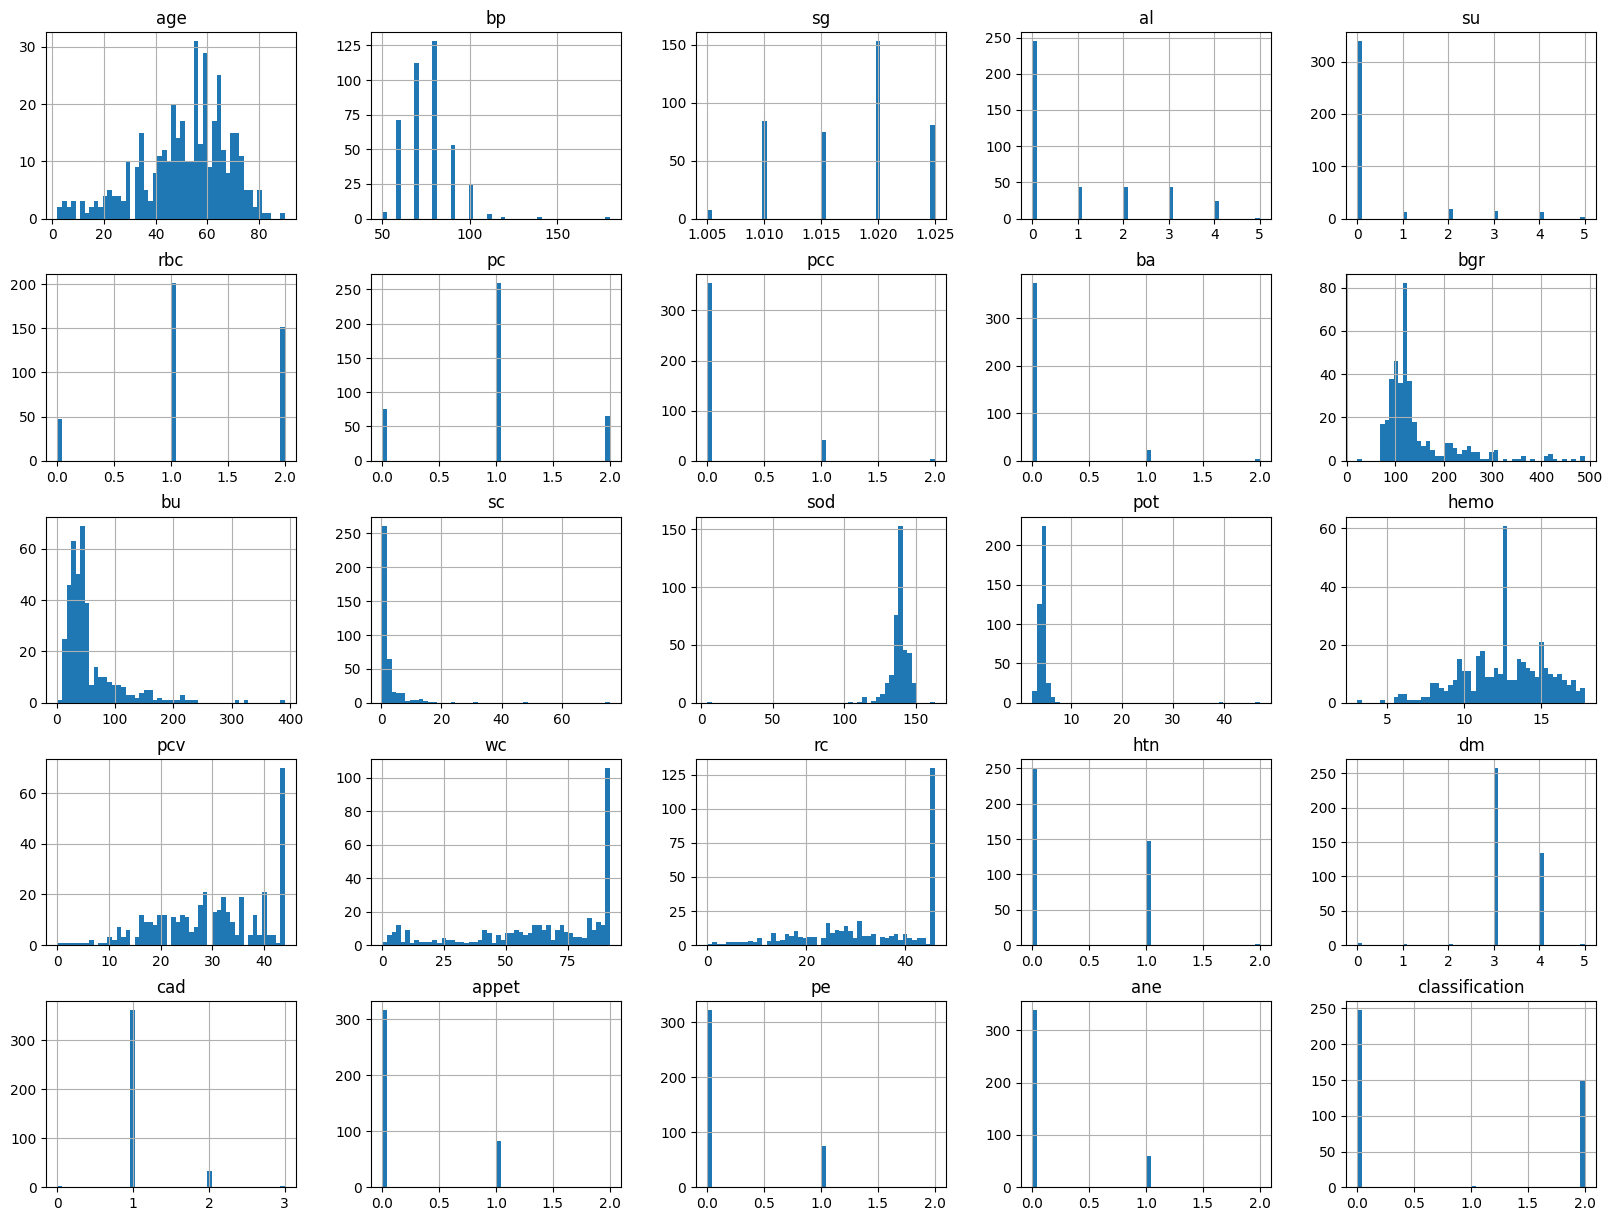

In [164]:
data.hist(bins=50,figsize=(20,15))
plt.show()

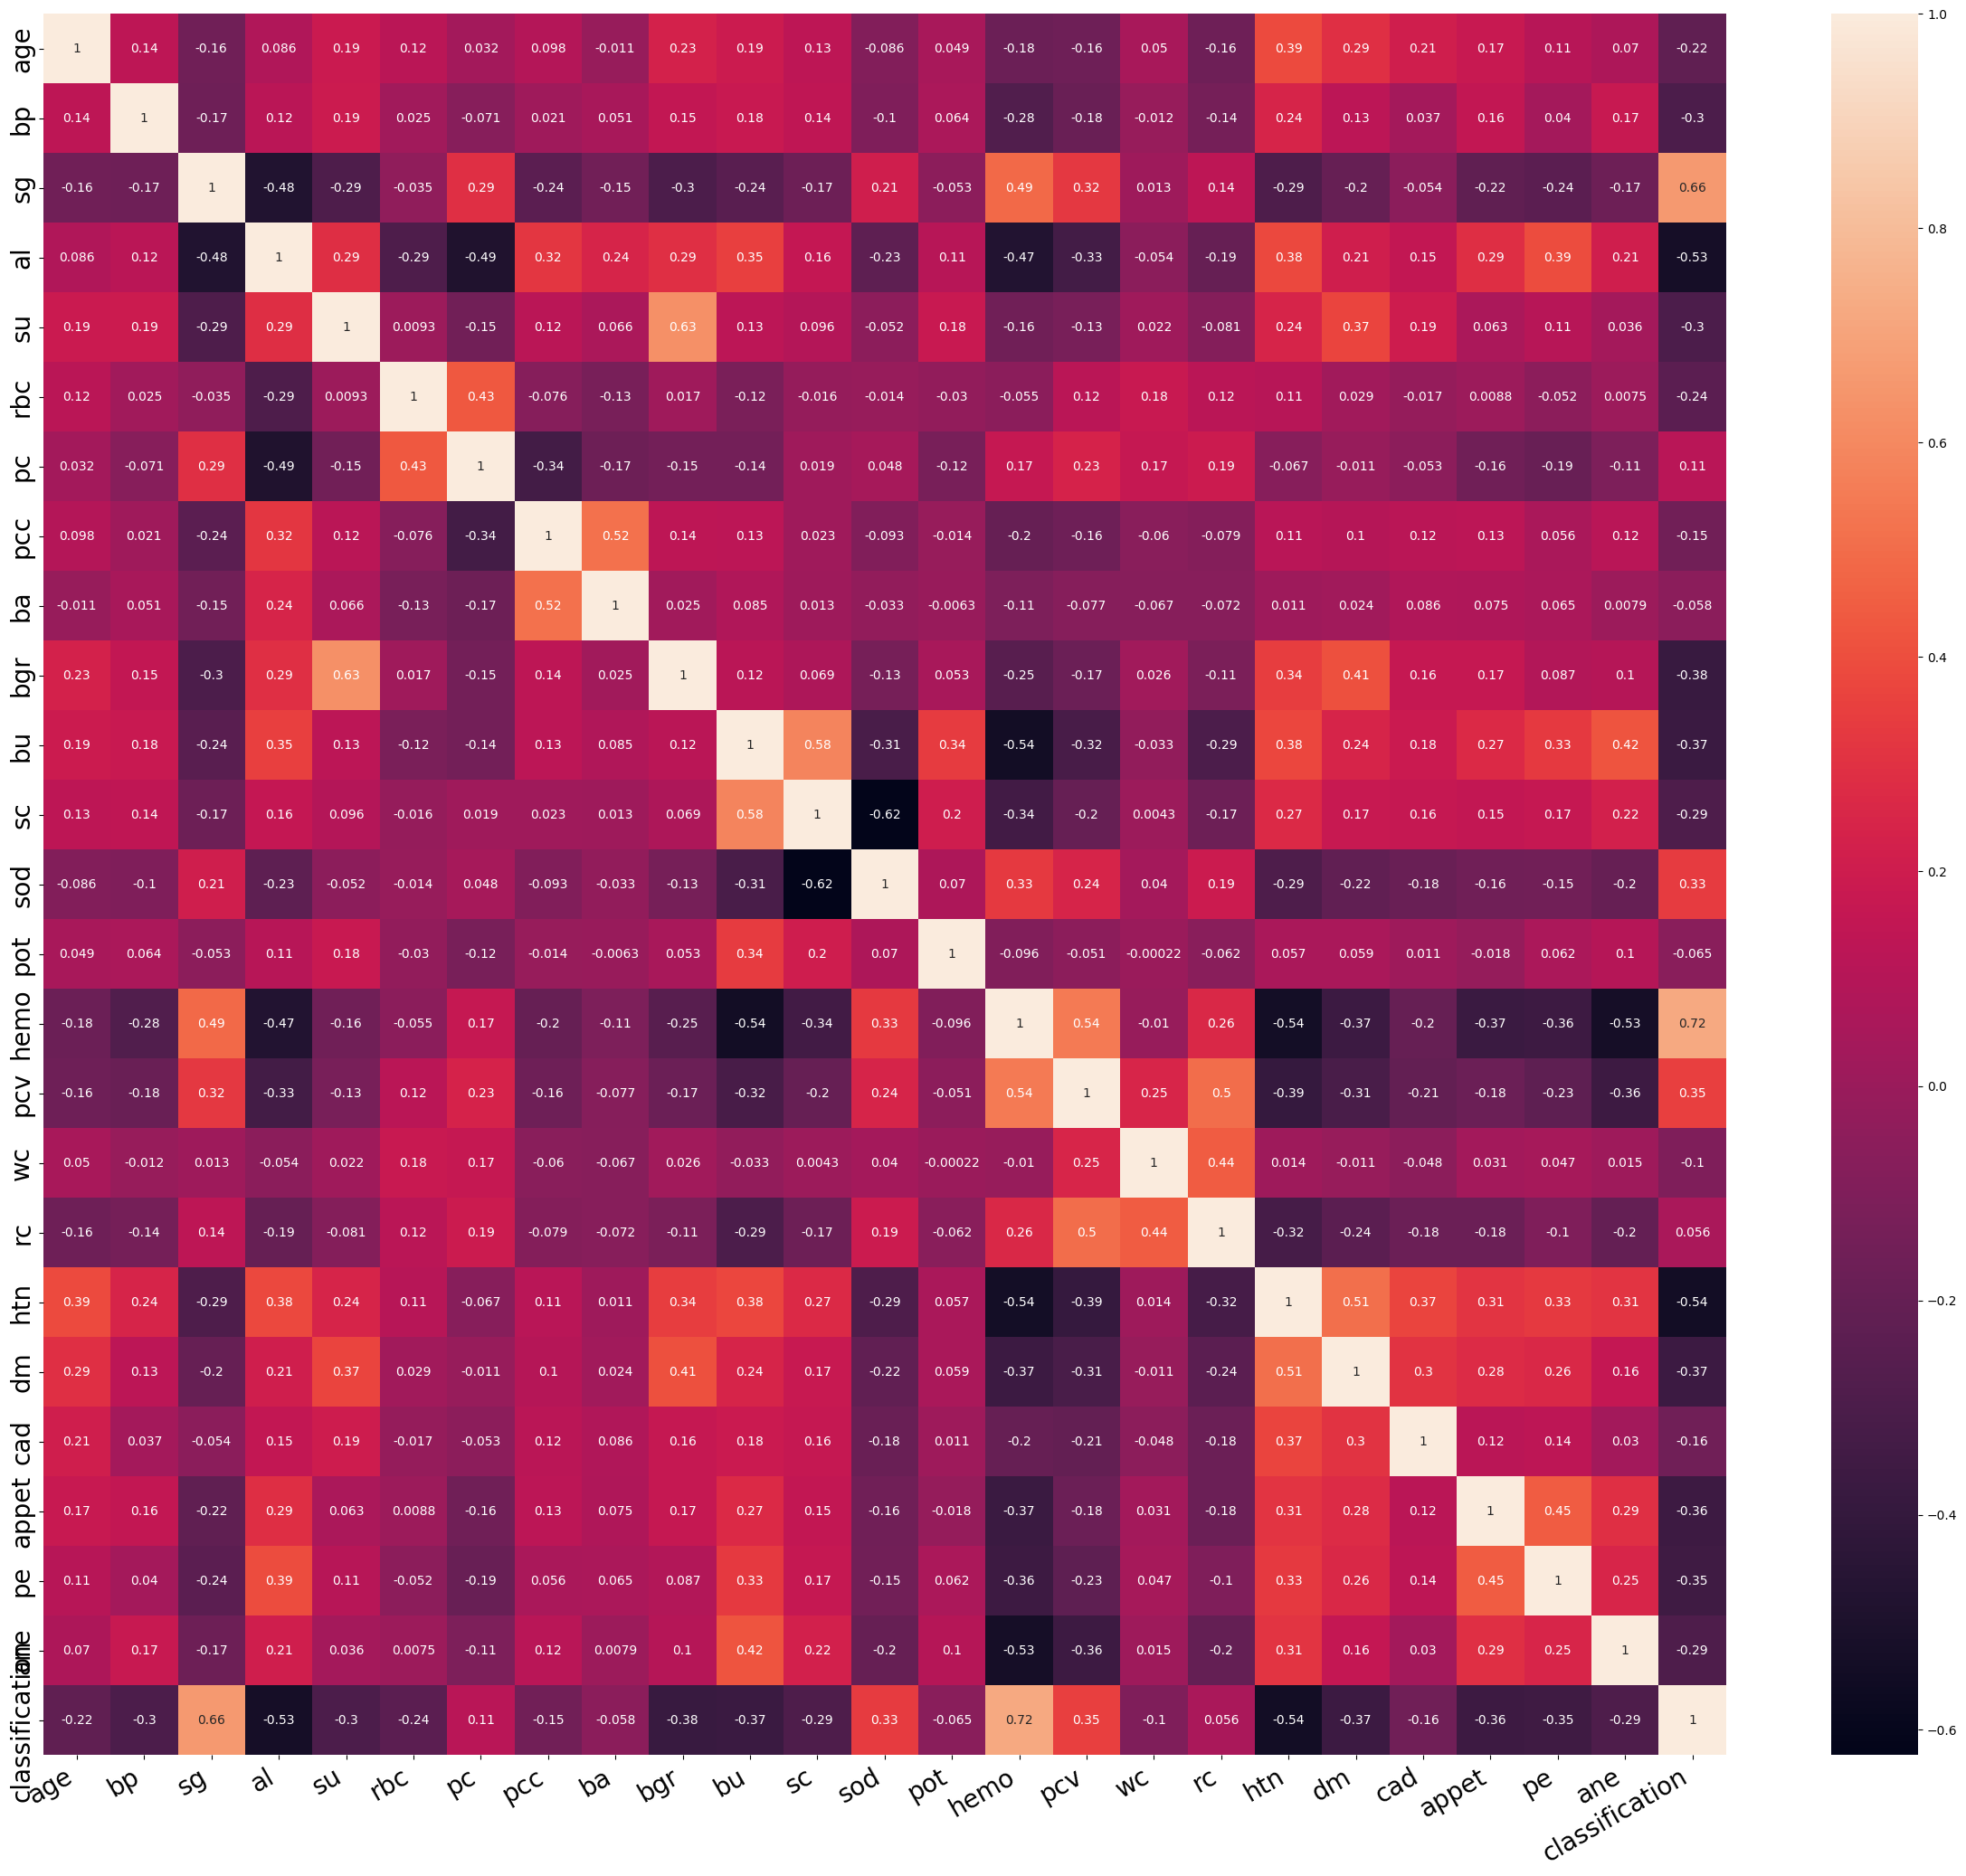

In [165]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = data.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [166]:
corr_matrix = data.corr()
corr_matrix['classification'].sort_values(ascending=False)

classification    1.000000
hemo              0.724742
sg                0.657810
pcv               0.349749
sod               0.334153
pc                0.114674
rc                0.055589
ba               -0.057511
pot              -0.065448
wc               -0.102709
pcc              -0.149153
cad              -0.155347
age              -0.222985
rbc              -0.238042
sc               -0.292050
ane              -0.293151
bp               -0.296613
su               -0.296919
pe               -0.352622
appet            -0.359114
dm               -0.366016
bu               -0.371536
bgr              -0.378495
al               -0.531885
htn              -0.543271
Name: classification, dtype: float64

array([[<AxesSubplot: xlabel='classification', ylabel='classification'>,
        <AxesSubplot: xlabel='hemo', ylabel='classification'>,
        <AxesSubplot: xlabel='sg', ylabel='classification'>,
        <AxesSubplot: xlabel='pcv', ylabel='classification'>,
        <AxesSubplot: xlabel='sod', ylabel='classification'>,
        <AxesSubplot: xlabel='pc', ylabel='classification'>,
        <AxesSubplot: xlabel='rc', ylabel='classification'>],
       [<AxesSubplot: xlabel='classification', ylabel='hemo'>,
        <AxesSubplot: xlabel='hemo', ylabel='hemo'>,
        <AxesSubplot: xlabel='sg', ylabel='hemo'>,
        <AxesSubplot: xlabel='pcv', ylabel='hemo'>,
        <AxesSubplot: xlabel='sod', ylabel='hemo'>,
        <AxesSubplot: xlabel='pc', ylabel='hemo'>,
        <AxesSubplot: xlabel='rc', ylabel='hemo'>],
       [<AxesSubplot: xlabel='classification', ylabel='sg'>,
        <AxesSubplot: xlabel='hemo', ylabel='sg'>,
        <AxesSubplot: xlabel='sg', ylabel='sg'>,
        <AxesSubplot:

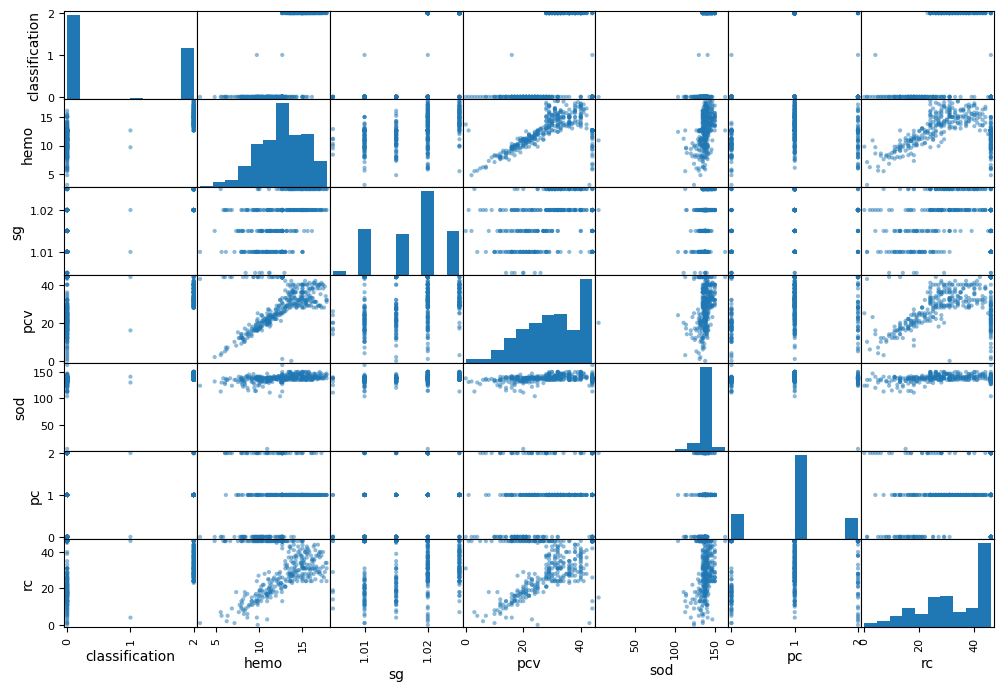

In [167]:
attributes = ['classification','hemo','sg','pcv','sod','pc','rc']
scatter_matrix(data[attributes],figsize=(12,8))

# Spliting entire data into Train and Test Segments

In [168]:
# Spliting entire data into Train and Test Segments
rng = RandomState()

train = data.sample(frac=0.7, random_state=rng)
test = data.loc[~data.index.isin(train.index)]

In [169]:
train.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
138,73.0,80.0,1.01,1.0,0.0,2,2,0,0,95.0,...,44,92,46,0,0,1,0,0,0,0
62,15.0,60.0,1.02,3.0,0.0,2,1,0,0,86.0,...,21,71,17,1,4,1,0,0,0,0
298,34.0,60.0,1.02,0.0,0.0,1,1,0,0,91.0,...,36,80,28,0,3,1,0,0,0,2
86,56.0,80.0,1.02,0.0,0.0,2,2,0,0,415.0,...,44,92,46,0,4,1,0,0,0,0
326,47.0,60.0,1.02,0.0,0.0,1,1,0,0,109.0,...,29,77,31,0,3,1,0,0,0,2


In [170]:
test.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
6,68.0,70.0,1.010,0.0,0.0,2,1,0,0,100.0,...,24,92,46,0,3,1,0,0,0,0
8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,138.0,...,21,88,19,1,4,1,0,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,20,43,17,1,4,1,1,1,0,0
16,47.0,70.0,1.015,2.0,0.0,2,1,0,0,99.0,...,44,92,46,0,3,1,0,0,0,0
22,48.0,80.0,1.025,4.0,0.0,1,0,0,0,95.0,...,20,64,13,1,3,1,0,0,1,0


In [171]:
data = train[attributes]
data.head(5)

,classification,hemo,sg,pcv,sod,pc,rc
138,0,12.65,1.01,44,142.0,2,46
62,0,11.00,1.02,21,138.0,1,17
298,2,13.50,1.02,36,135.0,1,28
86,0,12.65,1.02,44,138.0,2,46
326,2,15.80,1.02,29,141.0,1,31


In [172]:
label = data['classification']
data = data.drop('classification',axis=1)
data.head(5)

,hemo,sg,pcv,sod,pc,rc
138,12.65,1.01,44,142.0,2,46
62,11.00,1.02,21,138.0,1,17
298,13.50,1.02,36,135.0,1,28
86,12.65,1.02,44,138.0,2,46
326,15.80,1.02,29,141.0,1,31


In [173]:
test.to_csv('test.csv')

# Split the data into train and test sets

In [174]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

In [175]:
def display_results(y_test,y_pred):
    # Print the Confusion Matrix and slice it into four pieces
    cm = confusion_matrix(y_test,y_pred)
    # visualize confusion matrix with seaborn heatmap
    cm_matrix = pd.DataFrame(data=cm)
    print("Model Accuracy:",accuracy_score(y_test,y_pred))
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# implementing the Machine Learning Algorithms

# 1.  Linear Regression

In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Linear Regression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
reg_pred = reg_model.predict(X_test)

In [200]:
# Calculate metrics
mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, reg_pred)
r2 = r2_score(y_test, reg_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.26066617585012475
Root Mean Squared Error (RMSE): 0.5105547726249602
Mean Absolute Error (MAE): 0.4397830098729304
R-squared (R²): 0.7267883932266073


# 2. Logistic Regression

In [177]:
# Logistic Regression
clf_model = LogisticRegression(random_state=0, max_iter=2000, solver='liblinear')
clf_model.fit(X_train, y_train)
clf_pred = clf_model.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_pred)
print("Logistic Regression Accuracy:", clf_accuracy)
print(classification_report(y_test, clf_pred))

Logistic Regression Accuracy: 0.8928571428571429
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           2       0.86      0.86      0.86        22

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56



Model Accuracy: 0.8928571428571429


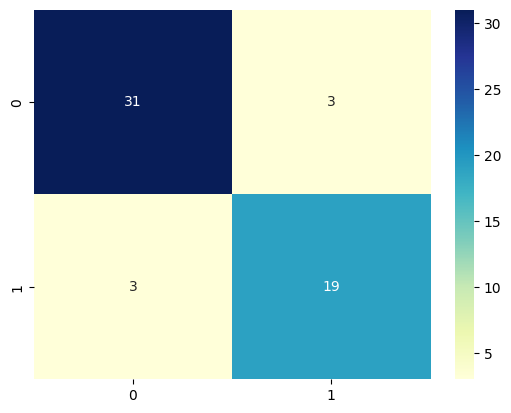

In [178]:
display_results(y_test,clf_pred) 

In [179]:
#tesing on test split
test_label = test['classification']
test_data = test[attributes].drop('classification',axis=1)
test_data.head(5) 

,hemo,sg,pcv,sod,pc,rc
6,12.4,1.010,24,104.0,1,46
8,10.8,1.015,21,138.0,0,19
11,10.8,1.010,20,131.0,0,17
16,12.6,1.015,44,138.0,1,46
22,9.8,1.025,20,136.0,0,13


Model Accuracy: 0.8333333333333334


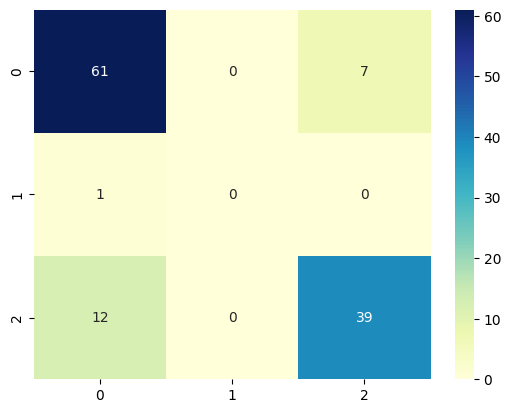

In [180]:
predict = clf_model.predict(test_data)
display_results(test_label,predict)

# 3. Navie Bayes

In [181]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           2       1.00      0.91      0.95        22

    accuracy                           0.96        56
   macro avg       0.97      0.95      0.96        56
weighted avg       0.97      0.96      0.96        56



Model Accuracy: 0.9642857142857143


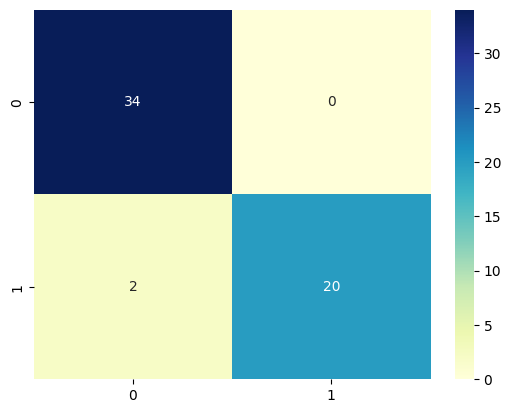

In [182]:
display_results(y_test,nb_pred)

# 4. Random Forest

In [183]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9821428571428571
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           2       1.00      0.95      0.98        22

    accuracy                           0.98        56
   macro avg       0.99      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



Model Accuracy: 0.9821428571428571


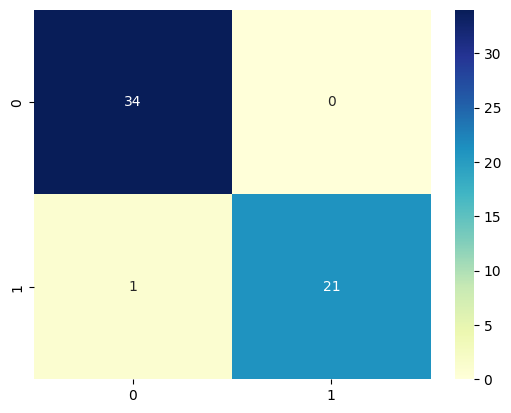

In [184]:
display_results(y_test,rf_pred)

# 5. Support Vector Machine (SVM)

In [207]:
from sklearn.svm import SVC
from sklearn import svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train,y_train)
svm_model_score = round(svm_model.score(X_train, y_train) * 100, 2)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine Accuracy:",svm_accuracy)
print(classification_report(y_test, svm_pred))

Support Vector Machine Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        34
           2       0.91      0.91      0.91        22

    accuracy                           0.93        56
   macro avg       0.93      0.93      0.93        56
weighted avg       0.93      0.93      0.93        56



Model Accuracy: 0.9285714285714286


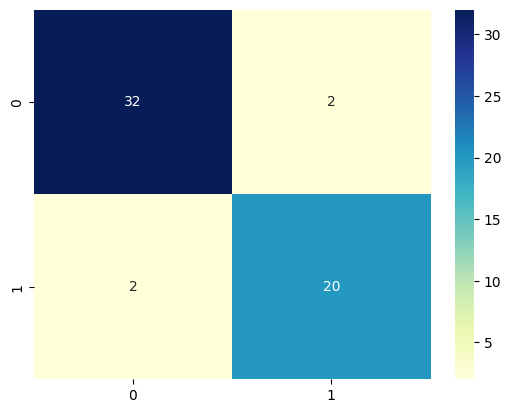

In [208]:
display_results(y_test,svm_pred)

# Comparing all the models

In [210]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Naive Bayes','Random Forest','SVM Model'],
    'Model Accuracy': [clf_accuracy, nb_accuracy, rf_accuracy, svm_accuracy]})
models.sort_values(by='Model Accuracy', ascending=False)

,Model,Model Accuracy
2,Random Forest,0.982143
1,Naive Bayes,0.964286
3,SVM Model,0.928571
0,Logistic Regression,0.892857
